# Machine Learning Pipelines and GridSearchCV
Estimated time needed: 25 minutes

Objectives
After completing this lab you will be able to:

Build and evaluate a machine learning pipeline
Implement GridSearchCV for hyperparameter tuning with crossvalidation
Implement and optimize a complex classification pipeline using real-world data
Extract feature importances from a trained pipeline

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [16]:
data = load_iris()
X, y = data.data, data.target
labels = data.target_names

In [17]:
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Instantiate a pipeline consisting of StandardScaler, PCA, and KNeighborsClassifier¶

In [3]:
pipeline = Pipeline([
    ('scalar', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
pipeline.fit(X_train, y_train)

test_score = pipeline.score(X_test, y_test)
print(f"{test_score:.3f}")

0.900


In [6]:
y_pred = pipeline.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

## Exercise 2. Generate the confusion matrix for the KNN model and plot it

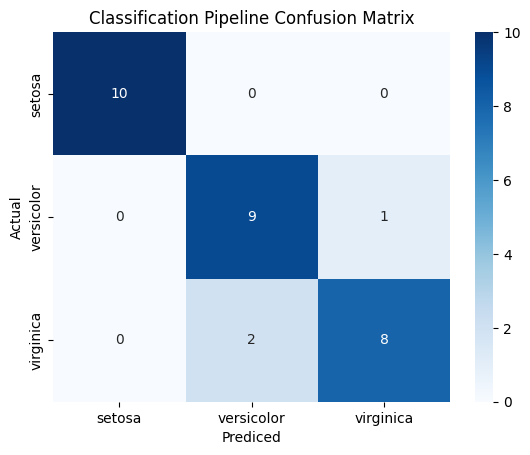

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Classification Pipeline Confusion Matrix')
plt.xlabel('Prediced')
plt.ylabel('Actual')
plt.show()

我們將對資料進行預處理，將其縮放並轉換為待確定數量的主成分，然後使用 KNN 模型分類器，並將這些估計器組合成一個流程。之後，我們將使用交叉驗證和超參數網格搜尋來優化該流程。這將使我們能夠找到適合試驗超參數集的最佳模型

In [18]:
# make a pipeline without specifying any parameters yet
pipeline = Pipeline(
                    [('scaler', StandardScaler()),
                     ('pca', PCA()),
                     ('knn', KNeighborsClassifier()) 
                    ]
                   )

In [22]:
param_grid = {
    'pca__n_components': [2, 3],
    'knn__n_neighbors': [3, 5, 7]
}

## Choose a cross validation method

In [23]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_model = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=2
    )

In [25]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

In [27]:
# Enter your code here
test_score = best_model.score(X_test,y_test)
print(f"{test_score:.3f}")

0.933


In [28]:
best_model.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 3}

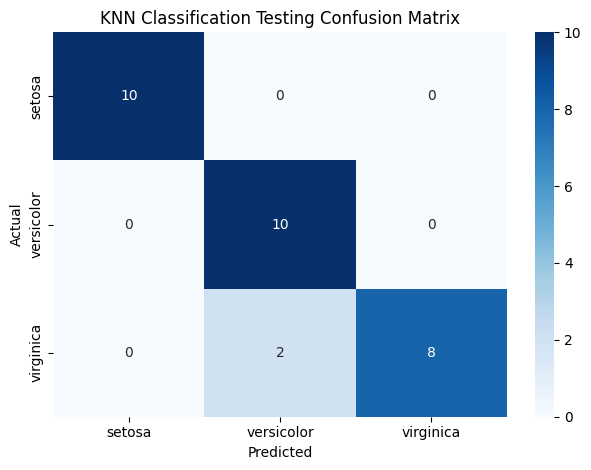

In [29]:
y_pred = best_model.predict(X_test)

# Generate the confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('KNN Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()